In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
### for printing all columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
data = pd.read_csv("bank_data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [4]:
### checking for Null value
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
### we have zero null value and all continuges varible

In [12]:
data["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

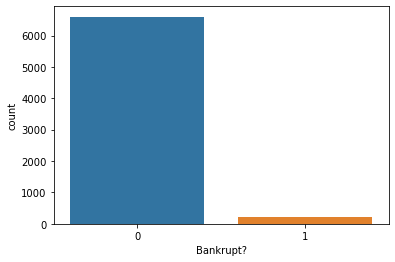

In [9]:
sns.countplot(data["Bankrupt?"])

In [18]:
X = data.drop(["Bankrupt?"],axis = 1)

In [20]:
Y = data["Bankrupt?"]

In [13]:
### this is the imblance dataset so we have to do sampling process

In [25]:
from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)

In [26]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 6599, 1: 220})
Resampled dataset shape Counter({1: 6563, 0: 6563})


In [28]:
X_res.shape,y_res.shape

((13126, 95), (13126,))

In [30]:
from imblearn.over_sampling import RandomOverSampler
# Implementing Oversampling for Handling Imbalanced 
smk = RandomOverSampler(random_state=42)
X_ran_sem,y_ran_sem=smk.fit_resample(X,Y)

In [31]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_ran_sem)))

Original dataset shape Counter({0: 6599, 1: 220})
Resampled dataset shape Counter({1: 6599, 0: 6599})


In [130]:
##### Select best K Features 

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [106]:
feature_selection=SelectKBest(chi2,k=90).fit(X_res,y_res)

In [107]:
selected_features=X_res.columns[feature_selection.get_support()]

In [109]:
x_res = X_res[selected_features]

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new = scaler.fit_transform(x_res)

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y_res,test_size=0.3,random_state=20)

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fit = model.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
from sklearn.metrics import accuracy_score,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [118]:
accuracy_score(fit.predict(x_train),y_train)

0.9097736177622987

In [119]:
accuracy_score(fit.predict(x_test),y_test)

0.9055358049771458

In [ ]:
#### models on different value of K

In [128]:
for k in [10,20,30,40,50,60,70,80,90,95]:
    feature_selection=SelectKBest(chi2,k=k).fit(X_res,y_res)
    selected_features=X_res.columns[feature_selection.get_support()]
    x_res = X_res[selected_features]
    x_new = scaler.fit_transform(x_res)
    x_train,x_test,y_train,y_test = train_test_split(x_new,y_res,test_size=0.3,random_state=20)
    model = LogisticRegression()
    fit = model.fit(x_train,y_train)
    print("===============================================================================================")
    print("The accuracy of the model when we have",k,"features")
    print(accuracy_score(fit.predict(x_test),y_test))
    print("==========================================================")
    print("The classification report:")
    print(classification_report(fit.predict(x_test),y_test))

The accuracy of the model when we have 10 features
0.6287455561198578
The classification report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      2075
           1       0.60      0.62      0.61      1863

    accuracy                           0.63      3938
   macro avg       0.63      0.63      0.63      3938
weighted avg       0.63      0.63      0.63      3938

The accuracy of the model when we have 20 features
0.6356018283392585
The classification report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2054
           1       0.62      0.63      0.62      1884

    accuracy                           0.64      3938
   macro avg       0.64      0.64      0.64      3938
weighted avg       0.64      0.64      0.64      3938

The accuracy of the model when we have 30 features
0.8859827323514474
The classification report:
              precision    recall  f1-score   support



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model when we have 40 features
0.8946165566277298
The classification report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1942
           1       0.91      0.88      0.89      1996

    accuracy                           0.89      3938
   macro avg       0.89      0.89      0.89      3938
weighted avg       0.90      0.89      0.89      3938



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model when we have 50 features
0.8976637887252412
The classification report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1924
           1       0.92      0.88      0.90      2014

    accuracy                           0.90      3938
   macro avg       0.90      0.90      0.90      3938
weighted avg       0.90      0.90      0.90      3938



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model when we have 60 features
0.8994413407821229
The classification report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1923
           1       0.92      0.88      0.90      2015

    accuracy                           0.90      3938
   macro avg       0.90      0.90      0.90      3938
weighted avg       0.90      0.90      0.90      3938



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model when we have 70 features
0.9052818689690199
The classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1936
           1       0.92      0.89      0.91      2002

    accuracy                           0.91      3938
   macro avg       0.91      0.91      0.91      3938
weighted avg       0.91      0.91      0.91      3938



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model when we have 80 features
0.9062976130015236
The classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1932
           1       0.92      0.89      0.91      2006

    accuracy                           0.91      3938
   macro avg       0.91      0.91      0.91      3938
weighted avg       0.91      0.91      0.91      3938



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the model when we have 90 features
0.9055358049771458
The classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1929
           1       0.92      0.89      0.91      2009

    accuracy                           0.91      3938
   macro avg       0.91      0.91      0.91      3938
weighted avg       0.91      0.91      0.91      3938

The accuracy of the model when we have 95 features
0.9037582529202641
The classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1932
           1       0.92      0.89      0.90      2006

    accuracy                           0.90      3938
   macro avg       0.90      0.90      0.90      3938
weighted avg       0.90      0.90      0.90      3938



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
#### model by support vector machines
from sklearn.svm import SVC
model = SVC()
fit = model.fit(x_new,y_res)

In [132]:
accuracy_score(fit.predict(x_test),y_test)

0.9555611985779584

In [134]:
print(classification_report(fit.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1888
           1       0.99      0.93      0.96      2050

    accuracy                           0.96      3938
   macro avg       0.96      0.96      0.96      3938
weighted avg       0.96      0.96      0.96      3938



In [ ]:
### from these three model we can predict that svm is best classification model from the above model for the data set